# Projeto Final - Udacity : Pesquisando Fraudes no Email da Enron Corporation

### Diego Serra
#### Março de 2019


>Versões utilizadas:
>>pyKernel: 4.9
>>Matplotlib: 2.2.0
>>Scikit-learn: 0.19.1
>>Spyder:3.1.4




## Resumo do caso Enron

A Enron Corporation foi uma companhia de energia americana, localizada em Houston, Texas. Empregava cerca de 21 000 pessoas, tendo sido uma das empresas líderes no mundo em distribuição de energia (electricidade, gás natural) e comunicações, mas decretou falência. Seu faturamento atingia 101 bilhões de dólares em 2000, pouco antes do escândalo financeiro que ocasionou sua falência.

A Enron foi criada para a distribuição de energia e conquistou excelentes resultados por meio de outros seguimentos, incluindo frequência de internet e risco ambiental. A companhia possuía uma excelente reputação, era fiscalizada por mais de uma empresa de auditoria, foi reconhecida por revistas como uma empresa americana mais inovadora e com seu crescimento, chamou atenção para o mercado desconfiar a origem de lucros tão altos mesmo em meio a crises.

A empresa usava técnicas contábeis e com as parcerias de outras empresas e bancos, manipulava o balanço financeiro e escondia débitos de milhões de dólares. A Enron começou a cair quando, após uma considerável queda de suas ações, o governo dos Estados Unidos levantou uma série de investigações comprovando que a mesma inflava os contratos e lucros, os ótimos números só existiam no papel. A investigação expôs o envolvimento de ex-executivos, contadores, advogados, transformando a corporação norte-americana de uma hora para outra um dos maiores escândalos empresariais da história mundial e os números passaram a ser analisados com muita atenção, com o rendimento das investigações, foram apurados um buraco de bilhões de dólares e além disso, pessoas prejudicadas moveram processos contra a companhia. A Enron foi capaz de usar artifícios sórdidos o suficiente para revoltar a população de tal forma que o então governador da Califórnia acabou com o mandato encurtado por decisão dos eleitores.

O Estado passou a intervir no intuito de evitar a queda contínua de investimentos no sentido de reanimar a confiança do investidor. Com isso, os poderes do governo se voltam para mitigar, minimizar os efeitos da crise. O congresso americano passou a redigir uma lei para evitar fraudes contábeis. As reformas criadas pelo senador Paul Sarbanes e deputado Michael Oxley ficaram conhecidas como a Lei Sarbanes-Oxley ou Lei SOX. A rigidez trazida pela lei americana levou ao IFRS, entidade representativa máxima da contabilidade no mundo, a revisar as legislações contábeis e começar a defender a convergência das práticas não só da contabilidade, mas também das práticas de gestão corporativa.

A Enron é um exemplo onde representa um mecanismo de fraude honesto e transparente. Onde os balanços publicados ficavam mais positivos, o que elevava a confiança dos compradores de ações. As ações subiam o que valorizava a empresa, que passou a valer os milhões suplementares que diziam ter.

O documentário Enron "Os mais espertos da sala" é analisado de forma engenhosa e escandalosa que toda a loucura e o caos de uma empresa que por optar pela forma fácil de ganhar dinheiro, acabam afundando na própria ganância e falta de ética, onde se tornaram uma verdadeira mina de corrupção.

Muitos executivos da Enron foram indiciados por várias acusações e alguns foram posteriormente condenados à prisão. O auditor da Enron, Arthur Andersen, foi considerado culpado em um Tribunal Distrital dos Estados Unidos de destruir ilegalmente documentos relevantes para a investigação da SEC, que anulou sua licença para auditar empresas públicas, fechando efetivamente o negócio. No momento em que a decisão foi anulada na Suprema Corte dos EUA, a empresa havia perdido a maioria de seus clientes e havia parado de operar. Os funcionários e acionistas da Enron receberam retornos limitados em processos judiciais, apesar de perder bilhões em pensões e preços de ações. Como conseqüência do escândalo, novas regulamentações e legislação foram promulgadas para expandir a precisão dos relatórios financeiros para empresas públicas. O ato aumentou a responsabilidade das empresas de auditoria em permanecerem imparciais e independentes de seus clientes.

### Bibliotecas que serão utilizadas

In [71]:
import pickle
import sklearn
### pprint: Utilizada para melhor visualizar o dicionário.
### fonte: (https://docs.python.org/3/library/pprint.html
import pprint
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%pylab inline
import seaborn as sns

Populating the interactive namespace from numpy and matplotlib


**Importar Dicionário**

In [72]:
enron_dict = pickle.load(open("final_project_dataset.pkl", "r"))
enron_dict_original = enron_dict

**Identificando Informações do conjunto de dados**

In [73]:
print 'Quantidade de pessoas no nosso Dataset: ', len(enron_dict) 

Quantidade de pessoas no nosso Dataset:  146


In [74]:
pretty = pprint.PrettyPrinter()

In [75]:
### Nome dos funcionários da Enron por ordem alfabética.
names = sorted(enron_dict.keys())

print 'Sobrenome por ordem alfabética:'
pretty.pprint(names) 

Sobrenome por ordem alfabética:
['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT 

In [76]:
###Verificar o exemplo de valores trazidos por cada nome. 
print 'Amostra de Informações no dicionário:'
pretty.pprint(enron_dict['ALLEN PHILLIP K'])
###Será necessário um .info() para verificar os dados totais.

Amostra de Informações no dicionário:
{'bonus': 4175000,
 'deferral_payments': 2869717,
 'deferred_income': -3081055,
 'director_fees': 'NaN',
 'email_address': 'phillip.allen@enron.com',
 'exercised_stock_options': 1729541,
 'expenses': 13868,
 'from_messages': 2195,
 'from_poi_to_this_person': 47,
 'from_this_person_to_poi': 65,
 'loan_advances': 'NaN',
 'long_term_incentive': 304805,
 'other': 152,
 'poi': False,
 'restricted_stock': 126027,
 'restricted_stock_deferred': -126027,
 'salary': 201955,
 'shared_receipt_with_poi': 1407,
 'to_messages': 2902,
 'total_payments': 4484442,
 'total_stock_value': 1729541}


In [77]:
### Vamos transformar o Dicionário para CSV para facilitar leituras futuras.

fieldnames = ['name'] + enron_dict['METTS MARK'].keys()

with open('enron.csv', 'w') as csvfile:
    writer = csv.DictWriter(csvfile, fieldnames=fieldnames)

    writer.writeheader()
    for name in enron_dict.keys():
        if name != 'TOTAL':
            n = {'name':name}
            n.update(enron_dict[name])
            writer.writerow(n)      


In [78]:
#Vamos ler o CSV em Pandas.
enron = pd.read_csv('enron.csv')

In [79]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 22 columns):
name                         145 non-null object
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               124 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        92 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          145 non-null bool
director_fees                16 non-null float64
deferred_inc

In [80]:
features_full_list_original = enron.columns.tolist()
print features_full_list_original 

['name', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'loan_advances', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'director_fees', 'deferred_income', 'long_term_incentive', 'email_address', 'from_poi_to_this_person']


In [81]:
#Vamos adicionar uma coluna total_be com a soma de 'bonus' e 'exercised_stock_options', incluindo zeros onde for vazio.
enron['total_be'] = enron['bonus'].fillna(0.0) + enron['exercised_stock_options'].fillna(0.0)

In [82]:
#Vamos adicionar a coluna 'total_millions', somando 'total_payments' e 'total_stock_value' ajustando a escala (/1000000).
enron['total_millions'] = (enron['total_payments'].fillna(0.0) + enron['total_stock_value'].fillna(0.0))/1000000

In [83]:
#Vamos adicionar colunas com a proporção entre enviados e recebido de POIs.
enron['fraction_to_poi'] = enron['from_this_person_to_poi'].fillna(0.0)/enron['from_messages'].fillna(0.0)
enron['fraction_from_poi'] = enron['from_poi_to_this_person'].fillna(0.0)/enron['to_messages'].fillna(0.0)

### Informações do Banco de Dados

In [84]:
#Informações do Banco de Dados Enron.
enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 26 columns):
name                         145 non-null object
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               124 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        92 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          145 non-null bool
director_fees                16 non-null float64
deferred_inc

Com as informações apresentadas em .info(),acima, podemos observar que podemos limitar nossa seleção de colunas. Algumas de nossas colunas têm muitos  dados ausentes, que representa aqueles que podemos remover. 

Colunas como "restricted_stock_deferred", "loan_advances" e "director_fees" podem ser alguns dos que podemos eliminar. 

Há colunas que parecem nos fornecer as mesmas informações, como "shared_receipt_with_poi", "to_messages", "from_messages", "from_this_person_to_poi" e "from_poi_to_this_person", todos informando sobre o comportamento de e-mail da pessoa e todos têm a mesma contagem de dados, 86.

As colunas que podem ser relevantes são as que possuem informação sobre o dinheiro: "salário", "total_payments", "exercised_stock_options", "bonus", "restricted_stock" e "total_stock_value".


### Estatística

O conjunto de dados contêm: 18 POIs.


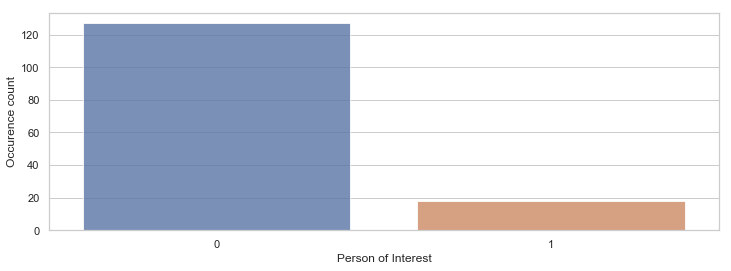

In [85]:
#Quantidade de pontos de interesse no banco de dados.
enron['poi'] = enron['poi'].apply(lambda x: 1 if x else 0)
poi = enron.poi.value_counts()


plt.figure(figsize=(12,4));
sns.barplot(poi.index, poi.values, alpha=0.8);
plt.xlabel('Person of Interest', fontsize=12);
plt.ylabel('Occurence count', fontsize=12);

print ('O conjunto de dados contêm: %s POIs.' % sum(enron['poi']))



In [86]:
# Imprimir estatísticas dos não-POIs.
non_poi = enron[enron.poi.isin([False])]

non_poi_money = non_poi[['salary','bonus','exercised_stock_options','total_stock_value',\
                         'total_payments','total_be','total_millions']].describe()
non_poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,7.700000e+01,6.500000e+01,8.900000e+01,1.070000e+02,1.060000e+02,1.270000e+02,127.000000
mean,2.621515e+05,9.868249e+05,1.947752e+06,2.374085e+06,1.725091e+06,1.870028e+06,3.440052
std,1.392317e+05,1.173880e+06,2.547068e+06,3.535017e+06,2.618288e+06,2.693997e+06,4.839977
min,4.770000e+02,7.000000e+04,3.285000e+03,-4.409300e+04,1.480000e+02,0.000000e+00,0.000000
25%,2.061210e+05,4.000000e+05,4.365150e+05,4.246845e+05,3.304798e+05,2.213790e+05,0.507935
50%,2.516540e+05,7.000000e+05,1.030329e+06,1.030329e+06,1.056092e+06,8.862310e+05,1.884748
75%,2.885890e+05,1.000000e+06,2.165172e+06,2.307584e+06,2.006025e+06,2.250522e+06,4.317325
max,1.060932e+06,8.000000e+06,1.536417e+07,2.381793e+07,1.725253e+07,1.636417e+07,31.874715


In [87]:
non_poi_email_behavior = non_poi[['shared_receipt_with_poi','to_messages',\
                                  'from_messages','fraction_from_poi','fraction_to_poi']].describe()
non_poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,72.000000,72.000000,72.000000,72.000000,72.000000
mean,1058.527778,2007.111111,668.763889,0.036107,0.152669
std,1132.503757,2693.165955,1978.997801,0.041929,0.206057
min,2.000000,57.000000,12.000000,0.000000,0.000000
25%,191.500000,513.750000,20.500000,0.007760,0.000000
50%,594.000000,944.000000,41.000000,0.022741,0.053776
75%,1635.500000,2590.750000,216.500000,0.050705,0.225000
max,4527.000000,15149.000000,14368.000000,0.217341,1.000000


Observando acima há resgistro de 100% do email de alguem indo para um POI. 

In [88]:
#Buscando o registro, que apresenta 100% na fração de envio para POI. 
enron[(enron['fraction_to_poi']>0.9)][['name','salary','total_be',\
                                       'restricted_stock','total_stock_value','to_messages','poi']]

,name,salary,total_be,restricted_stock,total_stock_value,to_messages,poi
10,HUMPHREY GENE E,130724.0,2282768.0,NaN,2282768.0,128.0,0


Apesar de HUMPHREY GENE E não ser um POI, tentei pesquisar informações que fossem relevantes para o projeto mas encontrei apenas informações sobre ser vice presidente da Enron Finance, e informações muito abrangentes para serem consideradas no projeto.

Fonte:
Enron Ascending: The Forgotten Years, 1984-1996
Por Robert L. Bradley, Jr.
>https://books.google.com.br/books?id=LgxtDwAAQBAJ&pg=PT421&lpg=PT421&dq=HUMPHREY+GENE+E+enron&source=bl&ots=v5SeYD5bBi&sig=ACfU3U23G8B8IhRhZASZkxdcXSA6FbVFkQ&hl=pt-BR&sa=X&ved=2ahUKEwjwgrGb1JjhAhVUA9QKHXisCh8Q6AEwBnoECAcQAQ#v=onepage&q=HUMPHREY%20GENE%20E%20enron&f=false

In [89]:
#Estatísticas das pessoas de interesse.

poi_info = enron[enron.poi.isin([True])]

poi_money = poi_info[['salary','bonus','exercised_stock_options','total_stock_value',\
                      'total_payments','total_be','total_millions']].describe()
poi_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,1.700000e+01,1.600000e+01,1.200000e+01,1.800000e+01,1.800000e+01,1.800000e+01,18.000000
mean,3.834449e+05,2.075000e+06,1.046379e+07,9.165671e+06,7.913590e+06,8.820307e+06,17.079261
std,2.783597e+05,2.047437e+06,1.238259e+07,1.384117e+07,2.396549e+07,1.222914e+07,35.289434
min,1.584030e+05,2.000000e+05,3.847280e+05,1.260270e+05,9.109300e+04,8.000000e+05,1.765324
25%,2.401890e+05,7.750000e+05,1.456581e+06,1.016450e+06,1.142396e+06,1.262500e+06,3.140359
50%,2.786010e+05,1.275000e+06,3.914557e+06,2.206836e+06,1.754028e+06,2.079817e+06,4.434161
75%,4.151890e+05,2.062500e+06,1.938604e+07,1.051133e+07,2.665345e+06,7.990914e+06,11.274354
max,1.111258e+06,7.000000e+06,3.434838e+07,4.911008e+07,1.035598e+08,4.134838e+07,152.669871


In [90]:
poi_email_behavior = poi_info[['shared_receipt_with_poi','to_messages', \
                               'from_messages','fraction_from_poi','fraction_to_poi']].describe()
poi_email_behavior

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,14.000000,14.000000,14.000000,14.000000,14.000000
mean,1783.000000,2417.142857,300.357143,0.047507,0.345470
std,1264.996625,1961.858101,805.844574,0.032085,0.156894
min,91.000000,225.000000,16.000000,0.021339,0.173611
25%,1059.250000,1115.750000,33.000000,0.026900,0.228580
50%,1589.000000,1875.000000,44.500000,0.030639,0.276389
75%,2165.250000,2969.250000,101.500000,0.059118,0.427083
max,5521.000000,7991.000000,3069.000000,0.136519,0.656250


In [91]:
#Diferença entre os pagamentos non-poi de poi.
dif_money = poi_money - non_poi_money
dif_money

,salary,bonus,exercised_stock_options,total_stock_value,total_payments,total_be,total_millions
count,-60.000000,-4.900000e+01,-7.700000e+01,-8.900000e+01,-8.800000e+01,-1.090000e+02,-109.000000
mean,121293.375859,1.088175e+06,8.516041e+06,6.791586e+06,6.188499e+06,6.950279e+06,13.639208
std,139128.027285,8.735576e+05,9.835520e+06,1.030615e+07,2.134720e+07,9.535142e+06,30.449457
min,157926.000000,1.300000e+05,3.814430e+05,1.701200e+05,9.094500e+04,8.000000e+05,1.765324
25%,34068.000000,3.750000e+05,1.020066e+06,5.917658e+05,8.119162e+05,1.041121e+06,2.632424
50%,26947.000000,5.750000e+05,2.884228e+06,1.176506e+06,6.979350e+05,1.193586e+06,2.549413
75%,126600.000000,1.062500e+06,1.722087e+07,8.203751e+06,6.593195e+05,5.740393e+06,6.957028
max,50326.000000,-1.000000e+06,1.898422e+07,2.529215e+07,8.630726e+07,2.498422e+07,120.795156


Nesta estatística conseguimos observar que há uma grande diferença entre a média e o valor máximo em total_millions

In [92]:
#Diferença no comportamento de e-mail non_poi e poi.
dif_in_email = poi_email_behavior - non_poi_email_behavior
dif_in_email

,shared_receipt_with_poi,to_messages,from_messages,fraction_from_poi,fraction_to_poi
count,-58.000000,-58.000000,-58.000000,-58.000000,-58.000000
mean,724.472222,410.031746,-368.406746,0.011399,0.192800
std,132.492868,-731.307854,-1173.153226,-0.009844,-0.049163
min,89.000000,168.000000,4.000000,0.021339,0.173611
25%,867.750000,602.000000,12.500000,0.019140,0.228580
50%,995.000000,931.000000,3.500000,0.007898,0.222613
75%,529.750000,378.500000,-115.000000,0.008413,0.202083
max,994.000000,-7158.000000,-11299.000000,-0.080822,-0.343750


A estatística do comportamento de e-mail não apresentou dados tão desproporcionais quanto a de valores.

In [93]:
#Vamos buscar informações em outras variáveis:
#poi: name, salary, bonus, exercised_stock_options, total_be, from_messages e fraction_to_poi, 
#ordenados por total_millions em ordem decrescente.

poi_info[['name','salary','bonus','exercised_stock_options','total_be','total_millions',\
          'from_messages','fraction_to_poi']].sort_values('total_millions',ascending=False)

,name,salary,bonus,exercised_stock_options,total_be,total_millions,from_messages,fraction_to_poi
65,LAY KENNETH L,1072321.0,7000000.0,34348384.0,41348384.0,152.669871,36.0,0.444444
95,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,24850000.0,34.776388,108.0,0.277778
125,HIRKO JOSEPH,NaN,NaN,30766064.0,30766064.0,30.857157,NaN,NaN
88,RICE KENNETH D,420636.0,1750000.0,19794175.0,21544175.0,23.047589,18.0,0.222222
124,YEAGER F SCOTT,158403.0,NaN,8308552.0,8308552.0,12.245058,NaN,NaN
60,DELAINEY DAVID W,365163.0,3000000.0,2291113.0,5291113.0,8.362240,3069.0,0.198436
4,HANNON KEVIN P,243293.0,1500000.0,5538001.0,7038001.0,6.679747,32.0,0.656250
82,BELDEN TIMOTHY N,213999.0,5249999.0,953136.0,6203135.0,6.612335,484.0,0.223140
53,SHELBY REX,211844.0,200000.0,1624396.0,1824396.0,4.497501,39.0,0.358974
141,CAUSEY RICHARD A,415189.0,1000000.0,NaN,1000000.0,4.370821,49.0,0.244898


Mesmo sem as informações de salário e bônus Joseph Hirko, sua posse de ações (exercised_stock_options) ficam em segundo lugar abaixo somente de Kenneth Lay. 

A coluna "exercited_stock_options" parece ser um bom indicador de um POI para os casos que não obtetivermos os valores de salário e bônus disponíveis, esse  recurso que será incluído em nossa seleção final de colunas. 

Essas colunas podem ser ainda mais importantes quando se considera a coluna "total_be", vamos adiciona-la ao nosso conjunto de dados. 

A quantidade de envio de emails não foi uma característica que foi possível identificar algo relevante para o projeto, neste momento. 

## Verificar as Variáveis (Colunas)

### salary

In [94]:
#Média de salários.
average_salary = enron.groupby('poi').mean()['salary']
average_salary

poi
0    262151.506494
1    383444.882353
Name: salary, dtype: float64

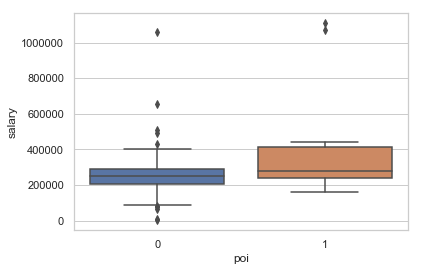

In [95]:
sns.boxplot(x='poi',y='salary',data=enron)

### bonus

In [96]:
#Média de Bônus.
average_bonus = enron.groupby('poi').mean()['bonus']
average_bonus

poi
0    9.868249e+05
1    2.075000e+06
Name: bonus, dtype: float64

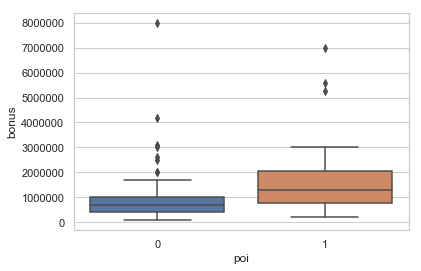

In [97]:
sns.boxplot(x='poi',y='bonus',data=enron)

É possivel observar que há bonûs de 8 milhões de dólares, o que chama a atenção.

In [98]:
enron[(enron['bonus']>5000000)][['name','salary','bonus','exercised_stock_options','restricted_stock','total_stock_value','poi']]

,name,salary,bonus,exercised_stock_options,restricted_stock,total_stock_value,poi
43,LAVORATO JOHN J,339288.0,8000000.0,4158995.0,1008149.0,5167144.0,0
65,LAY KENNETH L,1072321.0,7000000.0,34348384.0,14761694.0,49110078.0,1
82,BELDEN TIMOTHY N,213999.0,5249999.0,953136.0,157569.0,1110705.0,1
95,SKILLING JEFFREY K,1111258.0,5600000.0,19250000.0,6843672.0,26093672.0,1


Buscamos  os valores acima de 5 milhões e podemos observar qe apesar de o maior bônus não ser um POI, a sequencia de bônus acima da média permanece sendo de POIs, que são diferenças significativas.A média dos bônus entre os POIs ainda são maiores que os não-POIs.
Desta forma, a variável bonus ainda pode ser útil no treinamento de nosso algoritmo.

### total_payments

In [99]:
#Média de total de pagamentos.
average_total_payments = enron.groupby('poi').mean()['total_payments']
average_total_payments

poi
0    1.725091e+06
1    7.913590e+06
Name: total_payments, dtype: float64

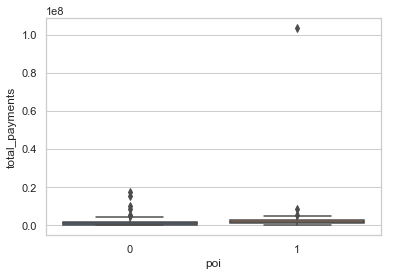

In [100]:
sns.boxplot(x='poi',y='total_payments',data=enron)

Aqui identificamos um outlier, que força toda a média para cima.

In [101]:
enron[(enron['total_payments']>40000000)][['name','total_payments','poi']]

,name,total_payments,poi
65,LAY KENNETH L,103559793.0,1


O outlier é LAY KENNETH L. com um volume total muito acima da média.
Pesquisando o nome no Wikipédia temos a seguinte informação:
   
Kenneth Lee "Ken" Lay (15 de abril de 1942 - 5 de julho de 2006) foi um empresário americano que se tornou conhecido durante o escândalo da Enron Corporation, empresa da qual fora fundador, chairman e CEO. Lay e Enron tornaram-se sinônimos de fraude corporativa nos Estados Unidos e no mundo inteiro no ano de 2001, quando se desencadeou o escândalo. Lay era CEO e chairman da empresa desde 1986 até sua renúncia no dia 23 de janeiro de 2002, exceto durante alguns meses de 2001, quando era apenas chairman e Jeffrey Skilling era CEO. No dia 5 de julho de 2006, Kenneth morreu de ataque cardíaco no Colorado. 
    
    Fonte:
    > https://pt.wikipedia.org/wiki/Kenneth_Lay
    

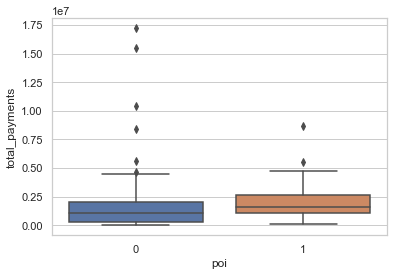

In [102]:
# Como fica box plot retirando LAY KENNETH L? 

kl_not_in = enron[(enron['total_payments']<40000000)]

sns.boxplot(x='poi',y='total_payments',data=kl_not_in)

A coluna total_payments provavelmente não será um utilizada, uma vez que, retirando LAY KENNETH L, os resultados para POI e não POI são semelhantes, podendo provocar distorções no nosso algoritimo.

### exercised_stock_options

In [103]:
#Média de exercised_stock_options.
average_optionsvalue = enron.groupby('poi').mean()['exercised_stock_options']
average_optionsvalue

poi
0    1.947752e+06
1    1.046379e+07
Name: exercised_stock_options, dtype: float64

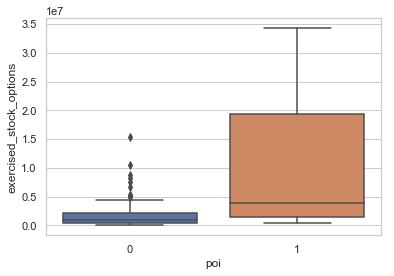

In [104]:
sns.boxplot(x='poi',y='exercised_stock_options',data=enron)

Os resultados da coluna exercised_stock_options, são bem diferentes para POIs do que para não POIs, esse recurso será utilizado.

### total_be 

In [105]:
#Média total_be (Total Bonus and Exercised Stock Options).
average_total_sbe = enron.groupby('poi').mean()['total_be']
average_total_sbe

poi
0    1.870028e+06
1    8.820307e+06
Name: total_be, dtype: float64

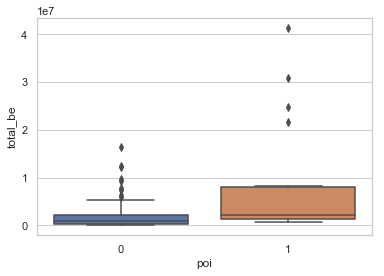

In [106]:
sns.boxplot(x='poi',y='total_be',data=enron)

A variável total_be pode ser relevante. No entanto, devido aos outliers essa coluna pode apresentar distorções.

### total_stock_value

In [107]:
#Média total_stock_value.
average_stockvalue = enron.groupby('poi').mean()['total_stock_value']
average_stockvalue

poi
0    2.374085e+06
1    9.165671e+06
Name: total_stock_value, dtype: float64

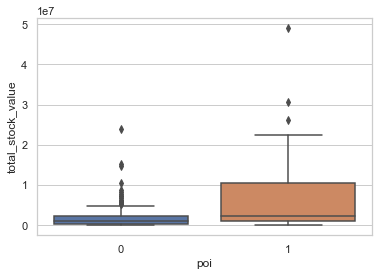

In [108]:
sns.boxplot(x='poi',y='total_stock_value',data=enron)

Com o resultado gráfico da coluna total_stock_value, podemos observar que a média, em geral, é muito mais alta para os POIs. Neste caso iremos usar este recurso.


### total_millions

In [109]:
#Média total_millionsl (Total Payments and Stock Value in Millions).
average_total_comp = enron.groupby('poi').mean()['total_millions']
average_total_comp

poi
0     3.440052
1    17.079261
Name: total_millions, dtype: float64

Vamos verificar graficamente sem o outilier LAY KENNETH L.

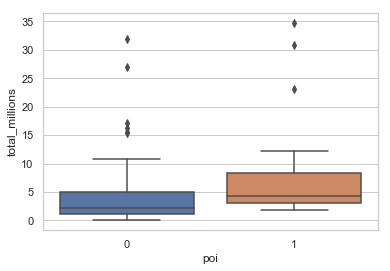

In [110]:
sns.boxplot(x='poi',y='total_millions',data= kl_not_in)

A coluna total_millions precisa ser melhor analisada.


### shared_receipt_with_poi

In [111]:
# Média de recibos compartilhado com POI
average_shared_receipt = enron.groupby('poi').mean()['shared_receipt_with_poi']
average_shared_receipt

poi
0    1058.527778
1    1783.000000
Name: shared_receipt_with_poi, dtype: float64

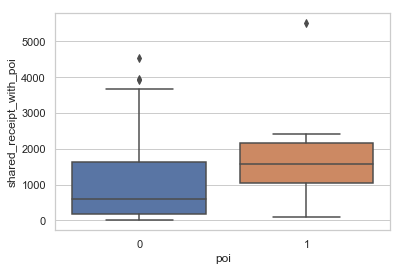

In [112]:
sns.boxplot(x='poi',y='shared_receipt_with_poi',data= enron)

### to_messages

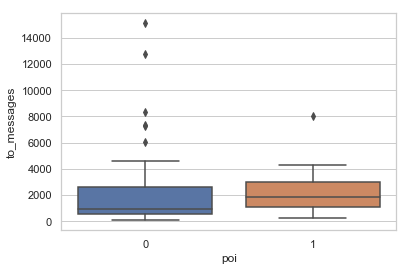

In [113]:
sns.boxplot(x='poi',y='to_messages',data= enron)

### from_messages

In [114]:
average_from = enron.groupby('poi').mean()['from_messages']
average_from

poi
0    668.763889
1    300.357143
Name: from_messages, dtype: float64

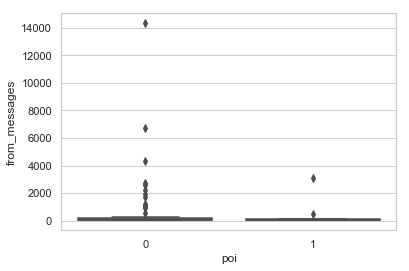

In [115]:
sns.boxplot(x='poi',y='from_messages',data= enron)

### fraction_to_poi

In [116]:
average_fraction_to = enron.groupby('poi').mean()['fraction_to_poi']
average_fraction_to

poi
0    0.152669
1    0.345470
Name: fraction_to_poi, dtype: float64

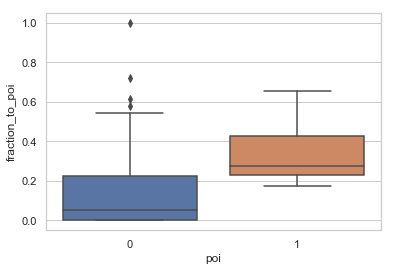

In [117]:
sns.boxplot(x='poi',y='fraction_to_poi',data= enron)

A maior parte da distribuição poi está na faixa superior da distribuição non-poi, Fraction_to_poi será adicionado a nossa lista.

### fraction_from_poi

In [118]:
average_fraction_from = enron.groupby('poi').mean()['fraction_from_poi']
average_fraction_from

poi
0    0.036107
1    0.047507
Name: fraction_from_poi, dtype: float64

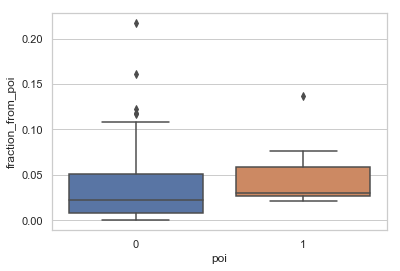

In [119]:
sns.boxplot(x='poi',y='fraction_from_poi',data= enron)

Vamos olhar as estatísticas um pouco mais de longe com o Pairplot.

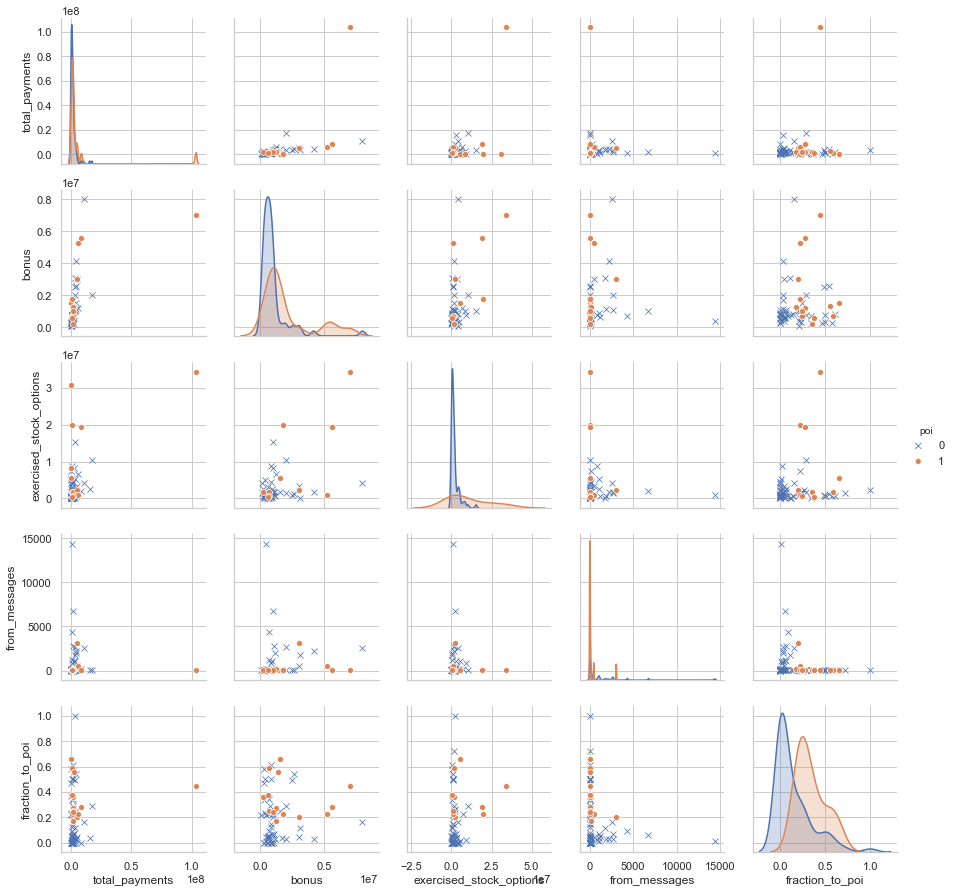

In [120]:
import seaborn as sns; sns.set(style="whitegrid", color_codes=True)

g = sns.pairplot(enron, vars=[ 'total_payments','bonus','exercised_stock_options','from_messages','fraction_to_poi'],
                 dropna=True, diag_kind="auto", hue='poi', markers=['x','o'])

## Outliers

Vamos dar uma olhada mais de perto no seguinte Lmplot.
Agora, vamos ver que outros valores discrepantes podemos encontrar. No parplot acima, havia dois POIs que realmente se destacaram.

**Obs: Os valores de não POI estão altos devido a variável "TOTAL" no dicionário, que será aliminada antes de realizarmos os testes** 


C:\Users\diego\Anaconda2\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


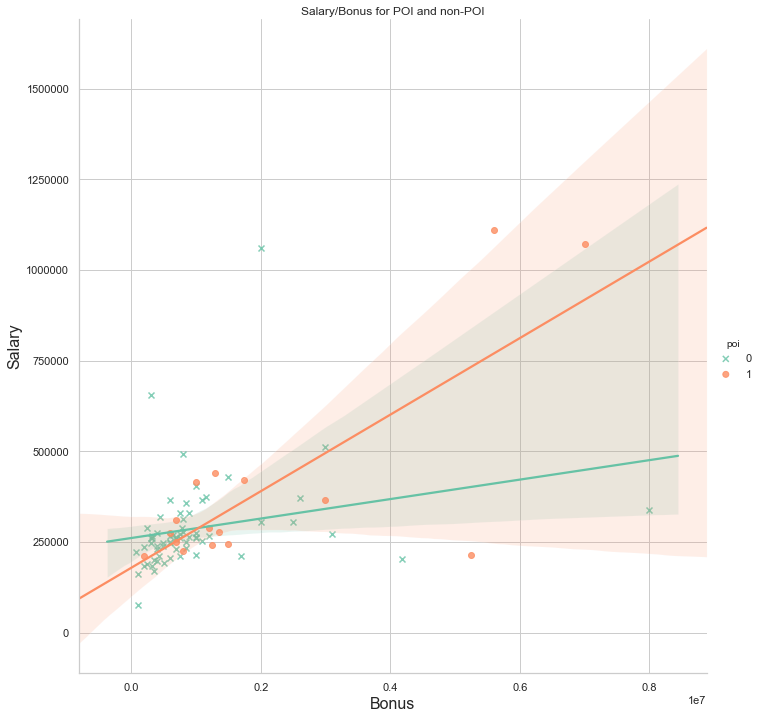

In [121]:
sns.lmplot(x='bonus', y= 'salary', hue='poi', data=enron, palette='Set2',size=10,markers=['x','o'])
plt.title('Salary/Bonus for POI and non-POI', fontsize=12)
plt.xlabel('Bonus', fontsize=16)
plt.ylabel('Salary', fontsize=16)

In [122]:
# Quem são os dois outliers em laranja com o alto salário e alto bônus?
enron[(enron['salary']>1000000)][['name','salary','bonus','poi']]

,name,salary,bonus,poi
65,LAY KENNETH L,1072321.0,7000000.0,1
95,SKILLING JEFFREY K,1111258.0,5600000.0,1
128,FREVERT MARK A,1060932.0,2000000.0,0


Conseguimos informações anteriores de LAY KENNETH L.

Agora Informações sobre SKILLING JEFFREY K:

Jeffrey Keith Skilling (nascido em 25 de novembro de 1953) é um criminoso condenado e antigo empresário americano, mais conhecido como o CEO da Enron Corporation durante o escândalo da Enron. Em 2006, ele foi condenado por acusações de federal crime relacionados com o colapso da Enron e eventualmente condenado a 24 anos de prisão. O Supremo Tribunal dos Estados Unidos ouviu argumentos no recurso do caso 1 de março de 2010. [2] [3] em 24 de junho de 2010, o Supremo Tribunal desocupou parte da condenação do Skilling e transferido o caso de volta para o Tribunal de instância inferior para julgamento.

Fonte:
>https://en.wikipedia.org/wiki/Jeffrey_Skilling

Também podemos encontrar alguns datapoints que estão causando ruído, verificando a existência de muitos valores ausentes nas linhas.

In [123]:
# verifique mais de 20 valores ausentes para cada ponto de dados
i = 0

for row in enron.isnull().sum(axis=1):
    if row > 20:
        print enron.iloc[i]
    i+=1

name                         LOCKHART EUGENE E
salary                                     NaN
to_messages                                NaN
deferral_payments                          NaN
total_payments                             NaN
exercised_stock_options                    NaN
bonus                                      NaN
restricted_stock                           NaN
shared_receipt_with_poi                    NaN
restricted_stock_deferred                  NaN
total_stock_value                          NaN
expenses                                   NaN
loan_advances                              NaN
from_messages                              NaN
other                                      NaN
from_this_person_to_poi                    NaN
poi                                          0
director_fees                              NaN
deferred_income                            NaN
long_term_incentive                        NaN
email_address                              NaN
from_poi_to_t

In [124]:
#verificar se há valores ausentes nos recursos
enron.isnull().sum()

name                           0
salary                        51
to_messages                   59
deferral_payments            107
total_payments                21
exercised_stock_options       44
bonus                         64
restricted_stock              36
shared_receipt_with_poi       59
restricted_stock_deferred    128
total_stock_value             20
expenses                      51
loan_advances                142
from_messages                 59
other                         53
from_this_person_to_poi       59
poi                            0
director_fees                129
deferred_income               97
long_term_incentive           80
email_address                 34
from_poi_to_this_person       59
total_be                       0
total_millions                 0
fraction_to_poi               59
fraction_from_poi             59
dtype: int64

Em loan_advances há 142 valores sem informação. 
Essa coluna será descartada antes de iniciarmos os testes.

In [125]:
enron.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 26 columns):
name                         145 non-null object
salary                       94 non-null float64
to_messages                  86 non-null float64
deferral_payments            38 non-null float64
total_payments               124 non-null float64
exercised_stock_options      101 non-null float64
bonus                        81 non-null float64
restricted_stock             109 non-null float64
shared_receipt_with_poi      86 non-null float64
restricted_stock_deferred    17 non-null float64
total_stock_value            125 non-null float64
expenses                     94 non-null float64
loan_advances                3 non-null float64
from_messages                86 non-null float64
other                        92 non-null float64
from_this_person_to_poi      86 non-null float64
poi                          145 non-null int64
director_fees                16 non-null float64
deferred_in

Modelo de Regressão para recursos e mensagens.

C:\Users\diego\Anaconda2\lib\site-packages\seaborn\regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


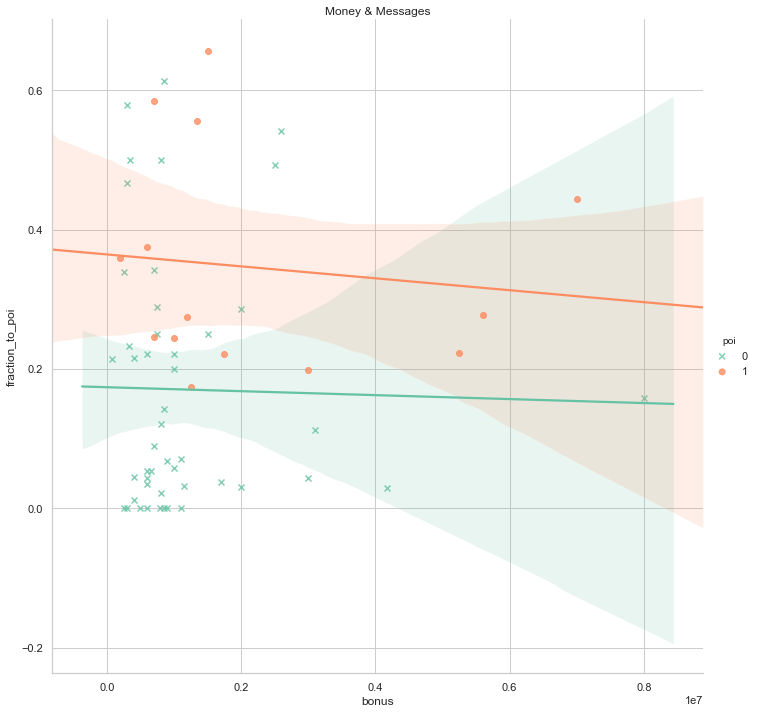

In [126]:
sns.lmplot(x='bonus', y='fraction_to_poi', hue='poi', data=enron, palette='Set2',size=10,markers=['x','o'])
plt.title('Money & Messages', fontsize=12)

## Transformação, Seleção e Ajuste dos dados

In [127]:
import sys
import pickle
sys.path.append("../tools/")

from feature_format import featureFormat, targetFeatureSplit
from tester import dump_classifier_and_data
#Alerta para a descontinuidade do módulo, mas consegui ajustar com as versões que serão destacadas no início do Notebook. 

In [128]:
features_full_list = enron.columns.tolist()
#remover 'name'.
features_full_list.pop(0)
#remover 'email_address'
features_full_list.pop(19)
#Remover 'loan_advances' devido os valores ausentes.
features_full_list.pop(11)
# remover 'director_fees' por causa de valores ausentes.
features_full_list.pop(15)
#retirar 'poi'. 
features_full_list.pop(14)
#adicionar POI ao inicio da lista.
features_list = ['poi']
for n in features_full_list:
    features_list.append(n)
features_list

['poi',
 'salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'exercised_stock_options',
 'bonus',
 'restricted_stock',
 'shared_receipt_with_poi',
 'restricted_stock_deferred',
 'total_stock_value',
 'expenses',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'deferred_income',
 'long_term_incentive',
 'from_poi_to_this_person',
 'total_be',
 'total_millions',
 'fraction_to_poi',
 'fraction_from_poi']

In [129]:
#Remover outliers identificado na analise que distorce os dados.
enron_dict.pop('TOTAL', 0)

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

In [130]:
#Remover 'LOCKHART EUGENE E', por não ser um POI, e com isso distorcer os dados.
enron_dict.pop('LOCKHART EUGENE E',0)

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [131]:
# Retirar 'loan_advances' devido a quantidade de valores ausentes.
for name in enron_dict:
    enron_dict[name].pop('loan_advances',0)

In [132]:
# Criar novas tabelas

#Vamos incluir a proporção de emails de POI sobre o total de mensagens.
#Vamos buscar todas as mensagens de poi_messages não nulas por all_messages não nulas.
def compFraction( poi_messages, all_messages ):
   
    fraction = 0.
    if poi_messages != 'NaN' and all_messages != 'NaN':
        fraction = float(poi_messages)/all_messages


    return fraction

In [133]:
for name in enron_dict:

    data_point = enron_dict[name]
#Vamos buscar a pessoa que recebeu a mensagem de POI.
    from_poi_to_this_person = data_point["from_poi_to_this_person"]
    to_messages = data_point["to_messages"]
    fraction_from_poi = compFraction( from_poi_to_this_person, to_messages )
#Proporções de POI.
    enron_dict[name]["fraction_from_poi"] = fraction_from_poi
  
    from_this_person_to_poi = data_point["from_this_person_to_poi"]
    from_messages = data_point["from_messages"]
    fraction_to_poi = compFraction( from_this_person_to_poi, from_messages )

    enron_dict[name]["fraction_to_poi"] = fraction_to_poi

In [134]:
#Vamos Adicionar a coluna total_be ao dicionário.
for name in enron_dict:
    data_point = enron_dict[name]
#Durante o Loop vamos subistituir os NAN por 0.0, para ser possível uma melhor manipulação.    
    bonus = data_point['bonus']
    if bonus == 'NaN':
        bonus = 0.0
    options = data_point['exercised_stock_options']
    if options == 'NaN':
        options = 0.0
    total = bonus+options
#Vamos adicionar ao dicionário o somatório de "bonus" e "exercised_stock_options" que é = total_be
    enron_dict[name]['total_be'] = total

In [135]:
#Para facilitar a visualização, vamos incluir a coluna total_millions em milhôes, dividindo-as por 1.000.000.
for name in enron_dict:
    data_point = enron_dict[name]
    
    total_payments = data_point['total_payments']
    if total_payments == 'NaN':
        total_payments = 0.0
    total_stock = data_point['total_stock_value']
    if total_stock == 'NaN':
        total_stock = 0.0
    total = (total_payments + total_stock)/1000000

    enron_dict[name]['total_millions'] = total

### Justificativa para Seleção de Variáveis

Após a verificação individual das variáveis(colunas), foram selecionadas algumas listas, que podem fornecer informações sobre o comportamento de um POI, e por consequencia ser interessante para os classificadores, considerando as características que mostraram uma maior diferença global entre as estatísticas POI e não-POI foram escolhidas.

>***Variáveis Escolhidas***

Nas representaçãoes podemos observar uma média mais elevada, para as remunerações individuais (salários, bônus), onde o mesmo vale para o total geral (total_millions) que apresenta uma tendência, média, para uma maior remuneração dos POIs em relação aos não POIs.

Outra média observada foi a que os POIs possuem participação mais positiva em "exercised_stock_options".


As colunas como "from_messages", não mostram variação relevante nos emails, a não ser para outros POIs (fraction_to_poi), o que vamos testar para verificar o desempenho para posteriormente realizar uma seleção final. 


In [136]:
#Relação de Variáveis disponíveis para teste.
print features_list 

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'total_be', 'total_millions', 'fraction_to_poi', 'fraction_from_poi']


In [137]:
#Serão montados 4 tipos de listas com as variáveis a serem utilizadas.
list_orig = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']
list_newf = ['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'total_be', 'total_millions', 'fraction_to_poi', 'fraction_from_poi']
list_1 = ['poi','total_millions','fraction_to_poi','from_messages']
list_2 = ['poi','total_be','fraction_to_poi','from_messages']
list_3 = ['poi','salary','bonus','fraction_to_poi','from_messages']
list_4 = ['poi','bonus','exercised_stock_options','fraction_to_poi']
features_final_list = list_4
print "Lista final:", features_final_list

Lista final: ['poi', 'bonus', 'exercised_stock_options', 'fraction_to_poi']


## Seleção de Algoritmo

### Métricas de avaliação


In [138]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
#https://scikit-plot.readthedocs.io/en/stable/
import scikitplot as skplt

from sklearn.cross_validation import StratifiedShuffleSplit

In [139]:
#Vamos importar 3 Classificadores para que possamos escolher de acordo com o desempenho.
#Apresentado em aula Udacity.
from sklearn.naive_bayes import GaussianNB
#Um classificador de árvore de decisão. fonte: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
from sklearn.tree import DecisionTreeClassifier
#Adaptação ao: https://paulovasconcellos.com.br/como-criar-seu-primeiro-aplicativo-de-machine-learning-7b6af291ba11
from sklearn.neighbors import KNeighborsClassifier

In [140]:
# Carregando 'my_test.py'
def test_list(classifier, feature_list, enron_dict):
    
    my_dataset = enron_dict
    
    data = featureFormat(my_dataset, feature_list, sort_keys = True) 
    labels, features = targetFeatureSplit(data) 
    
    X = np.array(features)
    y = np.array(labels)
    sss = StratifiedShuffleSplit(labels, n_iter=1000, test_size=0.3, random_state=42)      
    for train_index, test_index in sss:
        features_train, features_test = X[train_index], X[test_index]
        labels_train, labels_test = y[train_index], y[test_index]
        
    clf = classifier
    clf.fit(features_train,labels_train)
    pred = clf.predict(features_test)
    
    if classifier == DecisionTreeClassifier():
        return {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
                'Recall': recall_score(labels_test,pred), 'Feature Importance': clf.feature_importances_}
    
    return {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
            'Recall': recall_score(labels_test,pred)}

### Desempenho de Cada Algoritimo:  Accuracy, Precision, and Recall
Cada lista será testada usando os três algoritmos escolhidos: Naive Bayes, Decision Tree e KNearest Neighbours.

Ao tentatar identificar os POIs, queremos evitar os falsos positivos.

Definições:

1. Verdadeiro positivo (TP) = número de casos corretamente identificados como POI.
2. Falso positivo (FP) = número de casos identificados incorretamente como POI. 
3. Verdadeiro negativo (TN) = número de casos corretamente identificados como não POI. 
4. Falso negativo (FN) = número de casos identificados incorretamente não POI. 


- Nossa pontuação de precisão nos mostrará nossa proporção de observação corretamente prevista para o total de observações: Accuracy = TP + TN / TP + FP + FN + TN

- A sensibilidade nos dirá a capacidade para determinar os POIs corretamente: Precision = TP / TP + FP.

- E a Recall, recall é o número de verdadeiros positivos dividido pelo número de verdadeiros positivos mais o número de falsos negativos: Recall = TP / TP + FN



In [141]:
#Lista sem a inclusão de novas fatures.
print list_orig
print 'GaussianNB: ', test_list(GaussianNB(),list_orig,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),list_orig,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),list_orig,enron_dict)

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'poi', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person']
GaussianNB:  {'Recall': 0.8333333333333334, 'Precision': 0.19230769230769232, 'Accuracy': 0.5}
DecisionTree:  {'Recall': 1.0, 'Precision': 1.0, 'Accuracy': 1.0}
KNeighbors:  {'Recall': 0.16666666666666666, 'Precision': 0.5, 'Accuracy': 0.8636363636363636}


In [142]:
#Lista com a inclusão de novas fatures.
print list_newf
print 'GaussianNB: ', test_list(GaussianNB(),list_newf,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),list_newf,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),list_newf,enron_dict)

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'total_be', 'total_millions', 'fraction_to_poi', 'fraction_from_poi']
GaussianNB:  {'Recall': 0.8333333333333334, 'Precision': 0.2631578947368421, 'Accuracy': 0.6590909090909091}
DecisionTree:  {'Recall': 0.16666666666666666, 'Precision': 0.1111111111111111, 'Accuracy': 0.7045454545454546}
KNeighbors:  {'Recall': 0.3333333333333333, 'Precision': 0.6666666666666666, 'Accuracy': 0.8863636363636364}


In [143]:
#lista completa
print features_list
print 'GaussianNB: ', test_list(GaussianNB(),features_list,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),features_list,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),features_list,enron_dict)

['poi', 'salary', 'to_messages', 'deferral_payments', 'total_payments', 'exercised_stock_options', 'bonus', 'restricted_stock', 'shared_receipt_with_poi', 'restricted_stock_deferred', 'total_stock_value', 'expenses', 'from_messages', 'other', 'from_this_person_to_poi', 'deferred_income', 'long_term_incentive', 'from_poi_to_this_person', 'total_be', 'total_millions', 'fraction_to_poi', 'fraction_from_poi']
GaussianNB:  {'Recall': 0.8333333333333334, 'Precision': 0.2631578947368421, 'Accuracy': 0.6590909090909091}
DecisionTree:  {'Recall': 0.16666666666666666, 'Precision': 0.125, 'Accuracy': 0.7272727272727273}
KNeighbors:  {'Recall': 0.3333333333333333, 'Precision': 0.6666666666666666, 'Accuracy': 0.8863636363636364}


In [144]:
#lista 1
print list_1
print 'GaussianNB: ', test_list(GaussianNB(),list_1,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),list_1,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),list_1,enron_dict)


['poi', 'total_millions', 'fraction_to_poi', 'from_messages']
GaussianNB:  {'Recall': 0.5, 'Precision': 0.6, 'Accuracy': 0.8780487804878049}
DecisionTree:  {'Recall': 0.16666666666666666, 'Precision': 0.2, 'Accuracy': 0.7804878048780488}
KNeighbors:  {'Recall': 0.0, 'Precision': 0.0, 'Accuracy': 0.8536585365853658}


C:\Users\diego\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [145]:
#lista 2
print list_2
print 'GaussianNB: ', test_list(GaussianNB(),list_2,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),list_2,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),list_2,enron_dict)

['poi', 'total_be', 'fraction_to_poi', 'from_messages']
GaussianNB:  {'Recall': 0.3333333333333333, 'Precision': 0.3333333333333333, 'Accuracy': 0.7948717948717948}
DecisionTree:  {'Recall': 0.3333333333333333, 'Precision': 0.3333333333333333, 'Accuracy': 0.7948717948717948}
KNeighbors:  {'Recall': 0.3333333333333333, 'Precision': 0.4, 'Accuracy': 0.8205128205128205}


In [146]:
#lista 3
print list_3
print 'GaussianNB: ', test_list(GaussianNB(),list_3,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),list_3,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),list_3,enron_dict)

['poi', 'salary', 'bonus', 'fraction_to_poi', 'from_messages']
GaussianNB:  {'Recall': 0.4, 'Precision': 0.2857142857142857, 'Accuracy': 0.7647058823529411}
DecisionTree:  {'Recall': 0.4, 'Precision': 0.4, 'Accuracy': 0.8235294117647058}
KNeighbors:  {'Recall': 0.4, 'Precision': 0.6666666666666666, 'Accuracy': 0.8823529411764706}


In [147]:
#lista 4
print list_4
print 'GaussianNB: ', test_list(GaussianNB(),list_4,enron_dict)
print 'DecisionTree: ', test_list(DecisionTreeClassifier(),list_4,enron_dict)
print 'KNeighbors: ', test_list(KNeighborsClassifier(),list_4,enron_dict)

['poi', 'bonus', 'exercised_stock_options', 'fraction_to_poi']
GaussianNB:  {'Recall': 0.2, 'Precision': 0.14285714285714285, 'Accuracy': 0.7368421052631579}
DecisionTree:  {'Recall': 0.4, 'Precision': 0.2, 'Accuracy': 0.7105263157894737}
KNeighbors:  {'Recall': 0.6, 'Precision': 0.75, 'Accuracy': 0.9210526315789473}


**Observando as simulações podemos verificar que a pontuação com o KNeighbors utilizando a list_4 foi de:**


- Accuracy: 0.9210526315789473 = 92%
- Precision:0.75 = 75%
- Recal:0.6 = 60%

Para nossa lista final será incluída as seguintes variáveis:

'poi','bonus','exercised_stock_options','fraction_to_poi'


# Teste de Validação

É necessário validar o classificador usando dados de treinamento/teste.

Utilizar apenas os mesmos dados pode gerar resultado excessivos.

Para isso vamos utilizar o StratifiedShuffleSplit para dividir nossos dados em dados de treinamento e teste.Podemos garantir que nossas classes sejam alocadas pela mesma proporção definida para treinamento/teste e que cada ponto de dados da classe seja selecionado aleatoriamente. 

Devido ao nosso pequeno conjunto de dados, definir as iterações para 1000 nos dará resultados mais confiáveis no final, pois teremos treinado e testado em quase todos os nossos pontos de dados, com a desvantagem do tempo de execução.

In [148]:
#Armazene my_dataset para deixar a exploração mais fácil.
my_dataset = enron_dict

#Extrair as colunas e rótulos para o local de teste do dataset.
data = featureFormat(my_dataset, features_final_list, sort_keys = True)
labels, features = targetFeatureSplit(data)

In [149]:
#Validação usando StratifiedShuffleSplit para distribuir uniformemente as classes entre os  dados de treinamento e de teste.
X = np.array(features)
y = np.array(labels)
sss = StratifiedShuffleSplit(labels, n_iter=1000, test_size=0.3, random_state=42)      
for train_index, test_index in sss:
    features_train, features_test = X[train_index], X[test_index]
    labels_train, labels_test = y[train_index], y[test_index]

#Verificque se há accuracy.
    
clf = KNeighborsClassifier()
clf.fit(features_train, labels_train)

print clf.score(features_test, labels_test)

0.9210526315789473



## Ajuste de Parâmetros

**Vamos ajustar os parâmetros do nosso Classificador de Árvore de Decisões e verificar se faria a diferença,  apesar de neste primeiro momento termos escolhido o KNeighbors.  
Os parâmetros podem controlar o overfitting / underfitting, portanto, ajustá-los certamente pode alterar as métricas.**

In [150]:
DecisionTreeClassifier().get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [151]:
#Arvore de Decisão
from sklearn.tree import DecisionTreeClassifier

#defina min_samples_split como 3 e aumente até que não seja mais útil
clf = DecisionTreeClassifier(min_samples_split=9)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

In [152]:
# Resultados anteriores:  [Accuracy: 0.71052631578947367, Precision: 0.20000000000000001, Recall:0.40000000000000002]

#print performance metrics
print {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
       'Recall': recall_score(labels_test,pred)}

{'Recall': 0.2, 'Precision': 0.25, 'Accuracy': 0.8157894736842105}


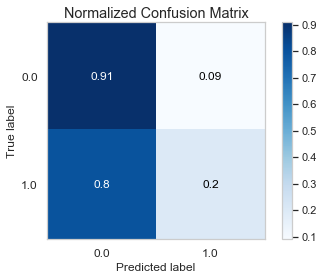

In [153]:
#Gráfico de Matriz de Confusão.
skplt.metrics.plot_confusion_matrix(labels_test, pred, normalize=True)

**Agora vamos tentar um ajuste no KNeiders Classifiere verificar se faria alguma diferença**

In [154]:
KNeighborsClassifier().get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [155]:
#Resultados anteriores: [Accuracy:0.92105263157894735, Precision:0.75, Recall:0.59999999999999998]

# Aumente o conjunto n_neighbors para 2 e aumente até que as métricas mostrem sobreajuste (no caso 6).
clf = KNeighborsClassifier(n_neighbors=5)
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

print {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
       'Recall': recall_score(labels_test,pred)}

{'Recall': 0.6, 'Precision': 0.75, 'Accuracy': 0.9210526315789473}


In [156]:
# Há possibilidade de melhorar o resultado anterior? [Accuracy:0.92105263157894735, Precision:0.75, Recall:0.59999999999999998]

#conjunto n_neighbors para 2,3 e 4

def test_param(n):
    clf = KNeighborsClassifier(n_neighbors=n)
    clf.fit(features_train,labels_train)
    pred = clf.predict(features_test)

    return [accuracy_score(labels_test,pred), precision_score(labels_test,pred), recall_score(labels_test,pred)]

In [157]:
print "2: ", test_param(2)
print "3: ", test_param(3)
print "4: ", test_param(4)
print "6: ", test_param(6)

2:  [0.9210526315789473, 0.75, 0.6]
3:  [0.8947368421052632, 0.6, 0.6]
4:  [0.9210526315789473, 0.75, 0.6]
6:  [0.9473684210526315, 1.0, 0.6]


### Vamos buscar os Melhores parâmetros para KNeighbors com GridSearchCV

In [158]:
from sklearn.model_selection import GridSearchCV

k = np.arange(10)+1
leaf = np.arange(30)+1
params = {'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute'),'leaf_size': leaf,'n_neighbors': k}

clf_params = GridSearchCV(KNeighborsClassifier(), params, cv=5)
clf_params.fit(features_train,labels_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]), 'leaf_size': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]), 'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [159]:
clf_params.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Qual o resultado que apresenta a sugestão de GridSearchCV?

In [161]:
clf = KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
                           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
                           weights='uniform')
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

print {'Accuracy': accuracy_score(labels_test,pred),'Precision': precision_score(labels_test,pred),
       'Recall': recall_score(labels_test,pred)}

{'Recall': 0.6, 'Precision': 0.75, 'Accuracy': 0.9210526315789473}



**Partindo destes resultados é o KNeighborsClassifier que vamos utilizar.**

***Obs: Apresenta o mesmo resultado da configuração utilizada, e foi decidido mante-la devido a quantidade de recursos utilizados.***

### SELEÇÃO DE VARIÁVEIS E ALGORITMO FINAL

As variáveis finais, com base na análise e teste de recurso, são:

1. 'bonus'
2. 'exercised_stock_options
3. 'fraction_to_poi'


Mesmo sem ajuste, com as configurações padrão, o classificador KNeighbors, apresentou um melhor resultado se comparado a Arvore de decisão.

As variáveis escolhidas, apresentaram um bom desempenho com esse classificador específico. 

Foram reduzidas para três com o objetivo de minimizar as distorções que podem acontecer com listas mais longas de variáveis. 

In [162]:
clf = KNeighborsClassifier()
clf.fit(features_train,labels_train)
pred = clf.predict(features_test)

print accuracy_score(labels_test,pred)
print precision_score(labels_test,pred)
print recall_score(labels_test,pred)

0.9210526315789473
0.75
0.6


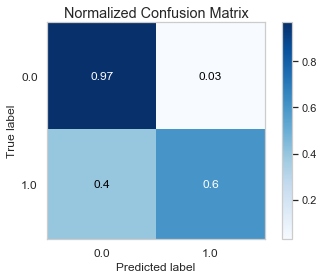

In [163]:
#Gráfico de matriz de confusão referente ao resultados do Classificador escolhido.
skplt.metrics.plot_confusion_matrix(labels_test, pred, normalize=True)

In [164]:
#Encerrar
features_list = features_final_list
dump_classifier_and_data(clf, my_dataset, features_list)

## Conclusão

Apesar de a quantidade de dados que realizamos o trabalho de fato ser pequena, e por isso usamos um método de validação, apresentando um resultado de :

- accuracy de 85-95%
- precison de 65-75%
- recall de 35-60%

podemos inferir que o método provou ser útil para a criação de um algoritimo confiável.

Os algoritimos Naive Bayes e Decision Tree Classifiers não tiveram desempenho tão bom, quando comparado ao KNeighbors Classifier.

Apesar de termos identificado um sobreajuste(overfitting) no KNeighbors Classifier, se mantermos sua configuração no padrão 5, manteremos resultados confiáveis.

Observando a matriz de confusão , conseguimos identificar 97% dos não POIs, para reduzir a margem de acusações ou desconfianças indevidas, e 60% dos POIs.

Focamos na idéia de evitar acusações indevidas, uma vez que com a evolução constante do aprendizado de máquina, possamos evitar a cusação de pessoas inocentes.